# Project 9 -Partial Correlations and Directed Acyclic Graphs

## Generating artificial data

In [98]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5

lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [31.38448507586338,
  24.910441284951407,
  21.541650531570184,
  23.461962101424966,
  22.106072948266437,
  20.903569592455227,
  29.056289709903133,
  23.406740174136186,
  25.28842843935828,
  24.040345051127012,
  24.814524383584725,
  25.642298784315066,
  24.47651184422132,
  26.138797717848483,
  24.230540198590642,
  24.247177961982242,
  23.707417773559612,
  25.477248613462404,
  23.91983460482953,
  23.55372425532956,
  21.94954399953578,
  19.247223023762942,
  25.503531638552023,
  20.067776372544024,
  25.157425758024722,
  23.97734221937949,
  24.545848562560828,
  27.230105936477898,
  26.441807058684827,
  24.134250654109287,
  22.18714583227215,
  25.071900805290586,
  31.173376078035485,
  24.069111396576922,
  23.52264847628438,
  22.517152716763206,
  21.91003642649349,
  23.736401976295667,
  25.66274301080748,
  20.811811769712673,
  26.663214161691666,
  25.359982077063062,
  25.56844508235997,
  20.21353275761337,
  25.85330394365884,
  22.01003119081701

In [100]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,31.384485,49.736177,149.355065,-52.597440,386.558569
1,24.910441,49.732693,150.072425,-42.452166,357.603485
2,21.541651,45.132818,126.203500,-49.172624,331.855318
3,23.461962,52.186651,146.126106,-46.871346,358.772065
4,22.106073,47.606763,151.416387,-47.151697,368.939033
...,...,...,...,...,...
99995,20.322071,44.086111,135.506799,-45.109588,327.568720
99996,23.948403,50.297476,156.465544,-57.903659,402.145658
99997,25.510611,55.846208,172.178705,-60.037758,433.350685
99998,25.534157,47.882126,142.916273,-51.940525,366.927095


<AxesSubplot:xlabel='Q', ylabel='Z'>

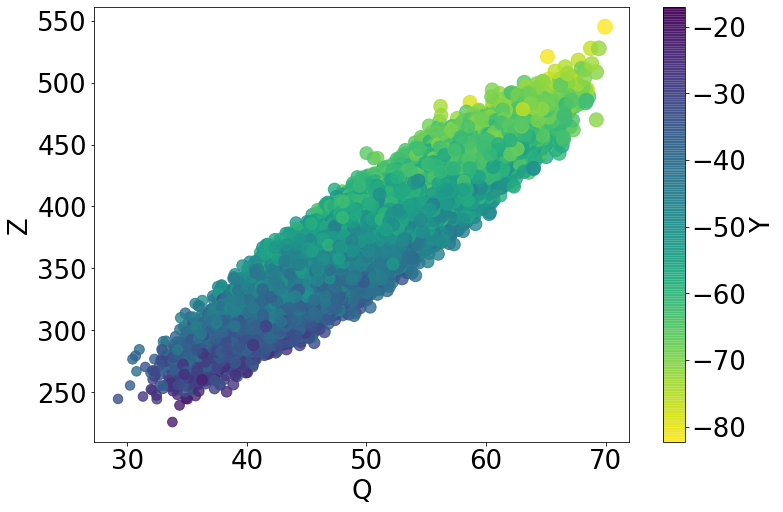

In [101]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize = (12, 8))
df.plot.scatter(x = "Q",
                y = "Z",
                c = "Y",
                s = "X",
                cmap = "viridis_r",
                alpha = .8,
                ax = ax)

In [102]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.005065,0.004521,-0.000862,0.144182
Q,0.005065,1.000000,0.948483,-0.706369,0.914753
X,0.004521,0.948483,1.000000,-0.670353,0.934786
Y,-0.000862,-0.706369,-0.670353,1.000000,-0.844793
Z,0.144182,0.914753,0.934786,-0.844793,1.000000


In [103]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 2.490e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:52:10   Log-Likelihood:            -1.9860e+05
No. Observations:              100000   AIC:                         3.972e+05
Df Residuals:                   99995   BIC:                         3.973e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0024      0.004      0.658      0.5

In [104]:
residuals

,P,Q,X,Y,Z
0,4.565571,-0.342090,2.568070,-2.764903,-5.453449
1,0.507991,0.393876,1.300244,0.582166,-2.219224
2,-2.003761,1.694479,-3.359935,-0.347816,1.151966
3,-0.508731,3.524597,-2.717032,0.644085,-1.063982
4,-2.268869,-2.520281,1.105474,1.436222,3.341313
...,...,...,...,...,...
99995,-0.707847,-1.514458,4.010562,-2.794939,-6.512381
99996,-1.453882,-2.186392,-0.037493,-0.015325,3.790838
99997,-0.741400,-1.116900,-0.436922,0.762111,4.031216
99998,0.872703,-0.369957,0.875318,-1.767122,-2.377437


In [105]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


In [106]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


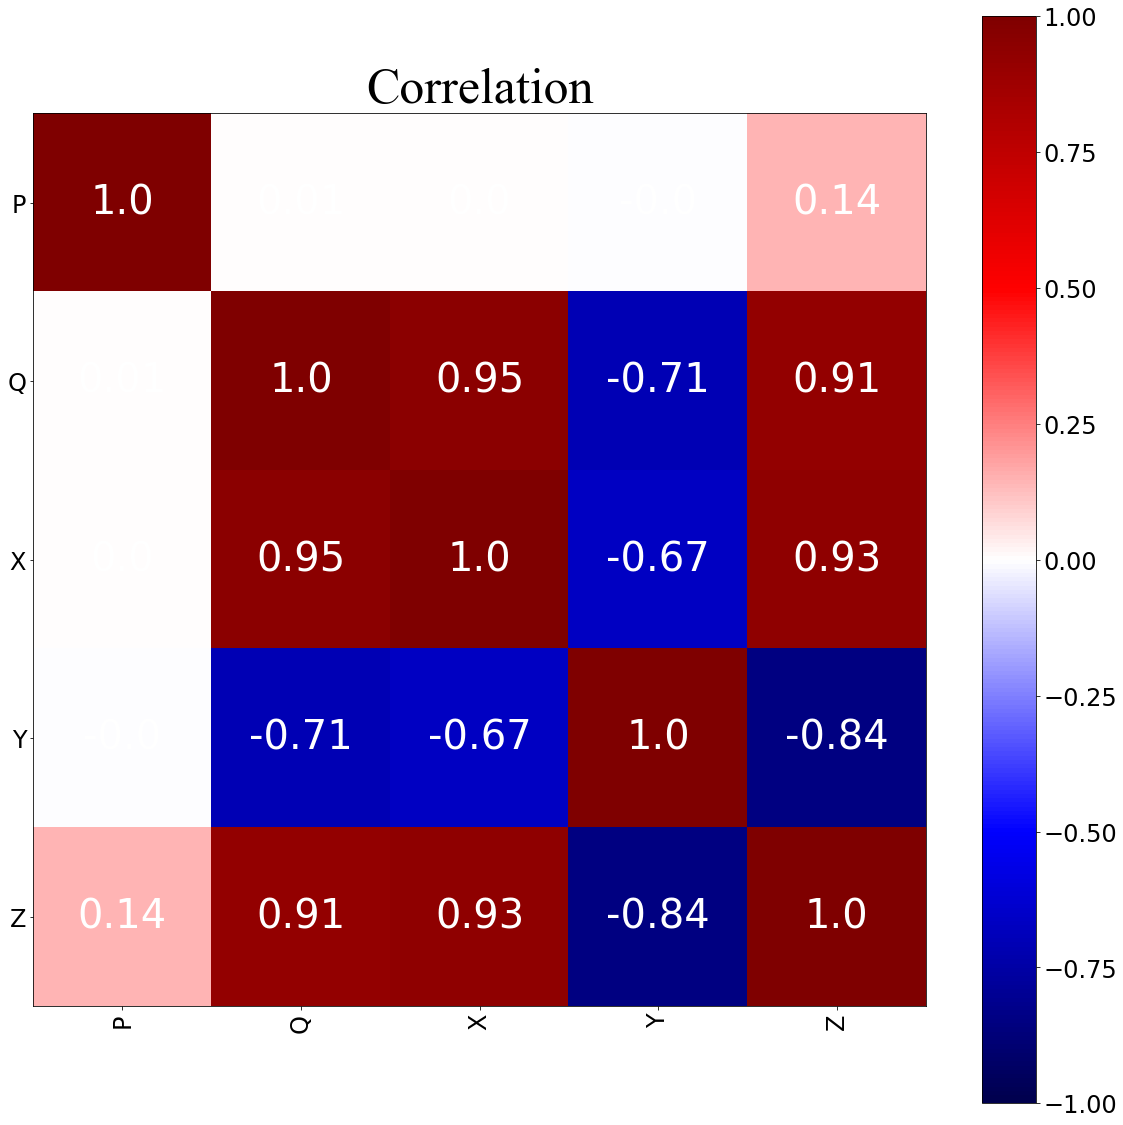

In [107]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")

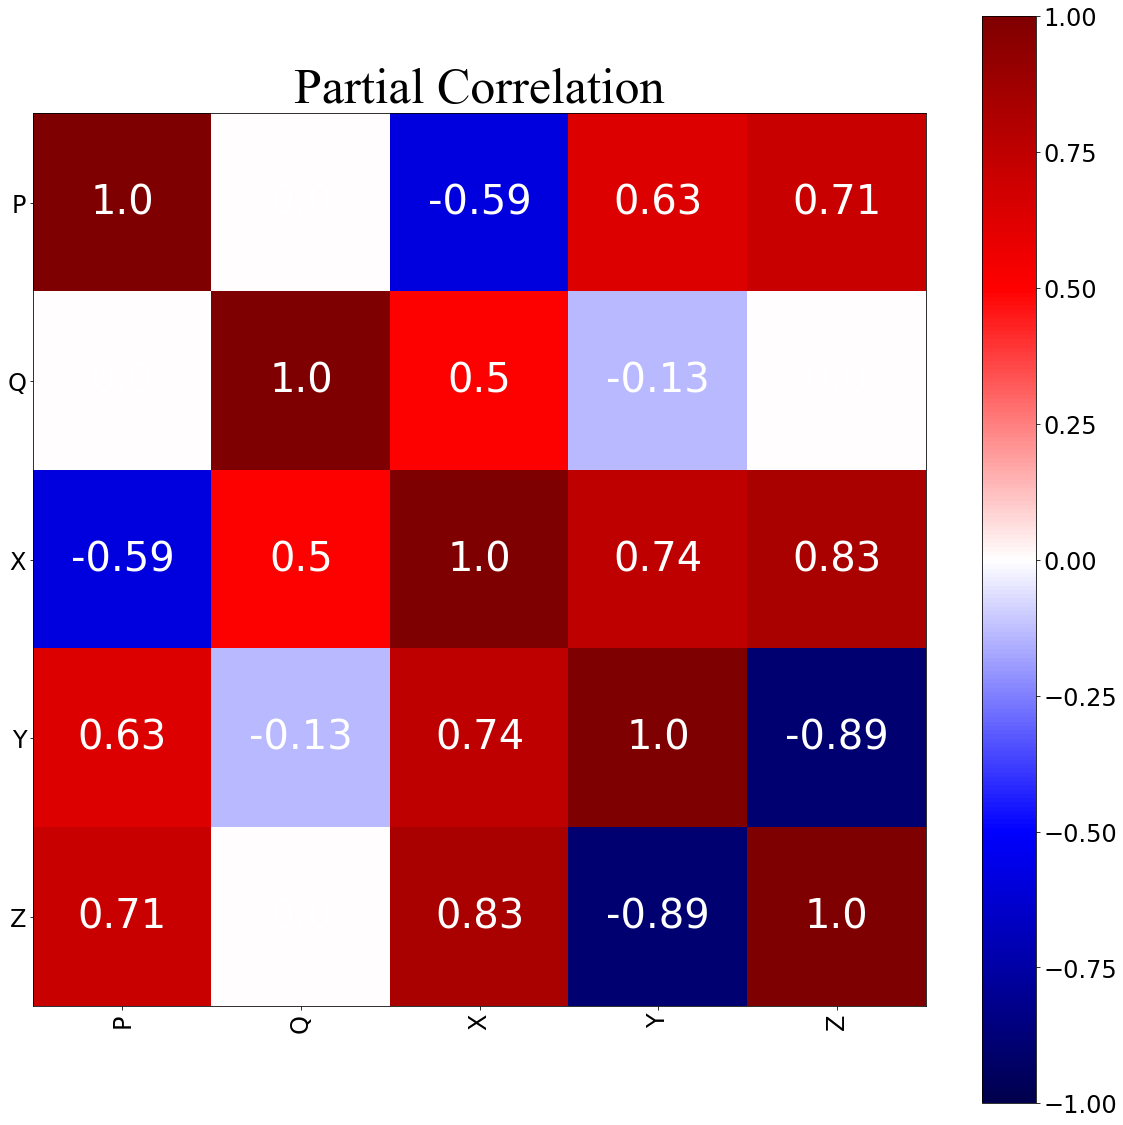

In [108]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")

In [109]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.4328
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                       0.511
Time:                        17:52:14   Log-Likelihood:                     -1.9860e+05
No. Observations:              100000   AIC:                                  3.972e+05
Df Residuals:                   99999   BIC:                                  3.972e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.51,0.0,0.0,0.00
Q,0.51,NaN,0.0,0.0,0.86
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.86,0.0,0.0,NaN


# Using partial correlations to build a causal skeleton

In [110]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]

In [111]:
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [112]:

import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

NetworkXError: random_state_index is incorrect

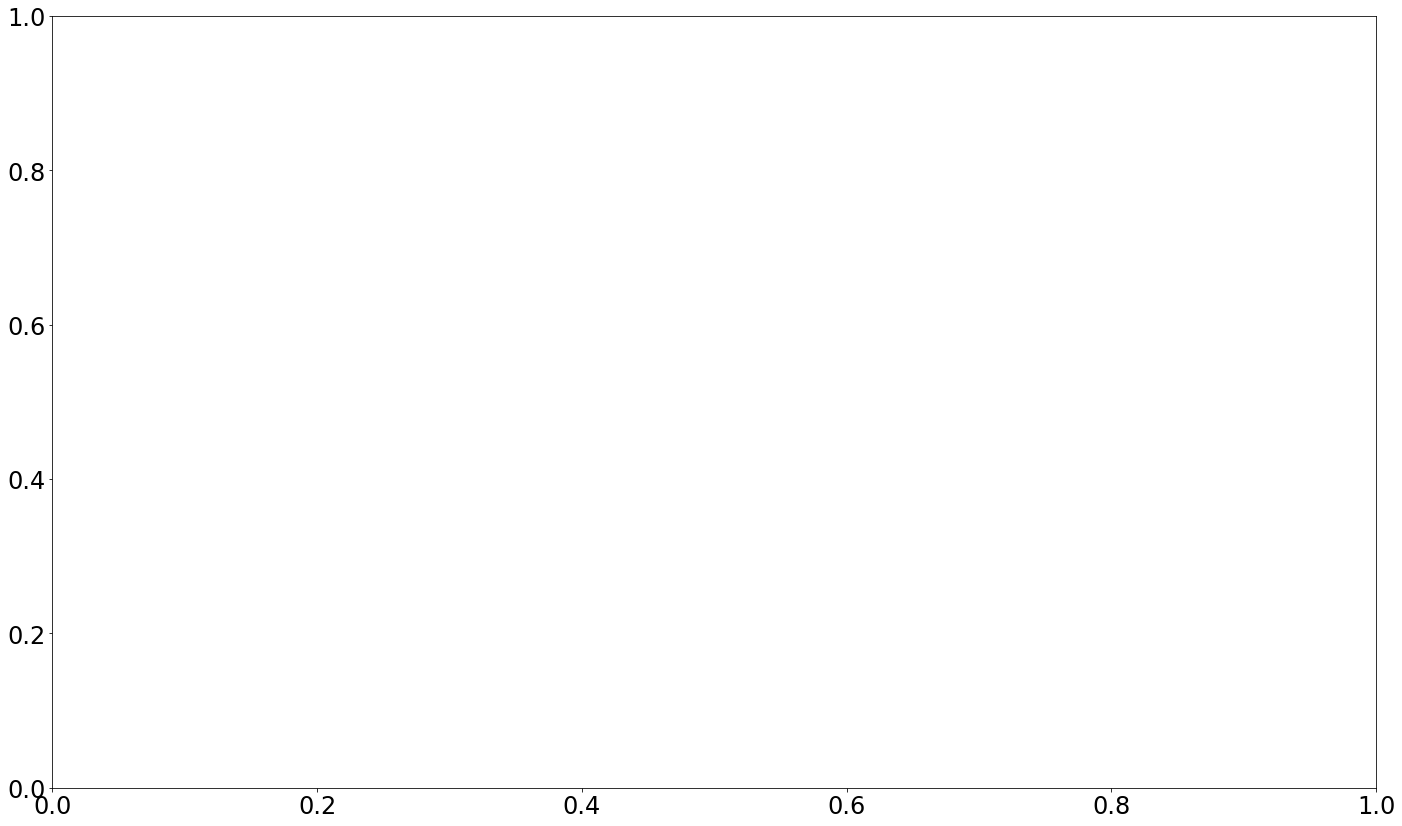

In [113]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [114]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                   variant = "parallel",
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars,
                   ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/3 [00:00<?, ?it/s]

NetworkXError: random_state_index is incorrect

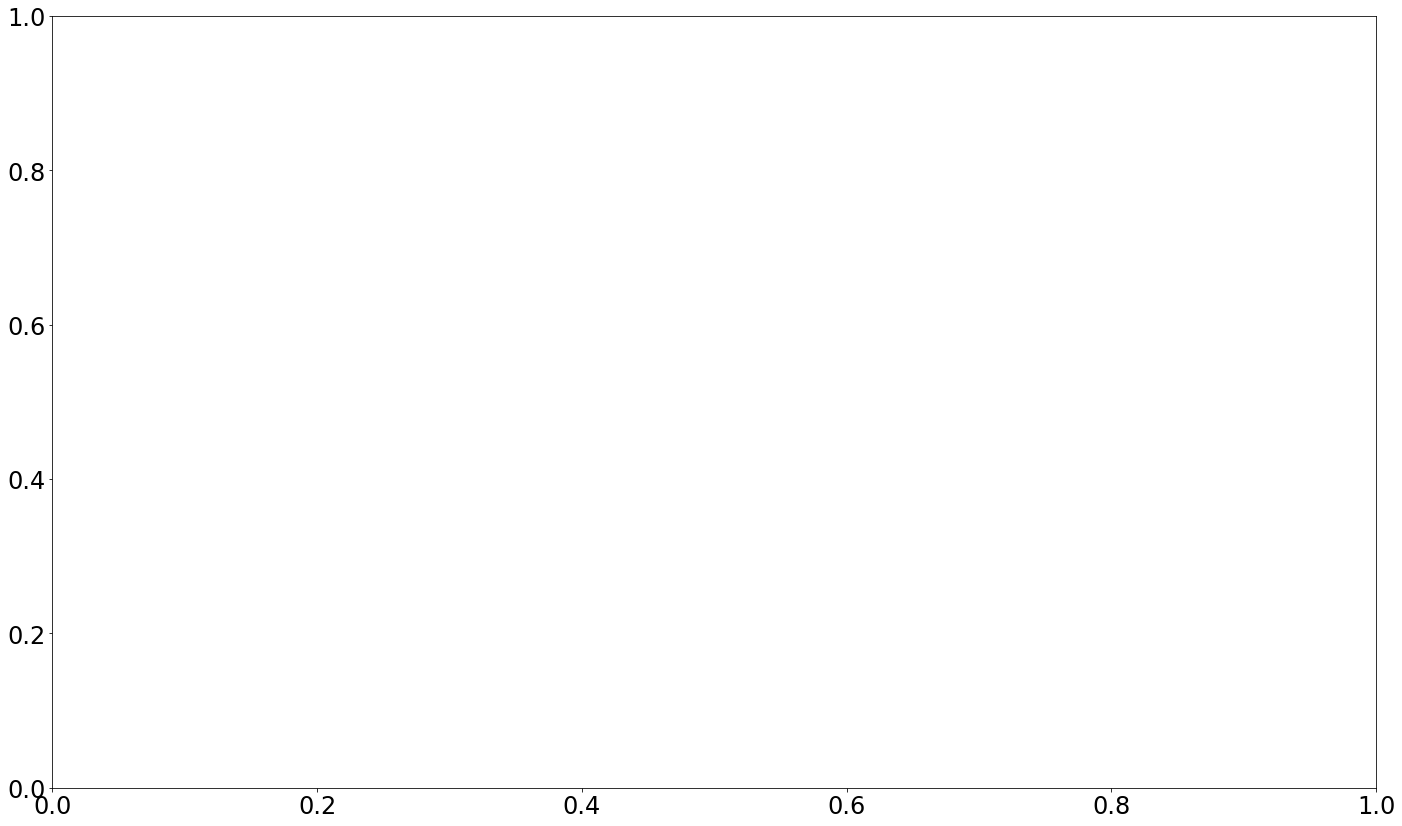

In [115]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = " "):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                     pos,
                     node_color=color_map,
                     node_size = 1200,
                     with_labels=True,
                     arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     ax = ax)
    plt.show()
    
graph_DAG(edges, df, title = "Directed Acyclic Graph")
